# Final

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('final.csv')

/Users/smartiiv/anaconda3/envs/data_visualisation/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,asin,overall,verified,timestamp,month,year,unixReviewTime,reviewerID,vote,count,cat2,rank,also_view,also_buy
0,0439381673,1.0,True,2014-06-09,6,2014,1402272000,A21ROB4YDOZA5P,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN
1,0439381673,3.0,True,2014-05-10,5,2014,1399680000,A3TNZ2Q5E7HTHD,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN
2,0439381673,4.0,True,2014-02-07,2,2014,1391731200,A1OKRM3QFEATQO,15,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN
3,0439381673,1.0,True,2014-02-07,2,2014,1391731200,A2XO1JFCNEYV3T,11,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN
4,0439381673,4.0,True,2014-01-16,1,2014,1389830400,A19WLPIRHD15TH,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN


In [4]:
df.loc[:,'timestamp'] = pd.to_datetime(df.loc[:,'timestamp'])

In [5]:
#check if there is review for the whole year of 2018

a = df[df['year']==2018]
a[a['month']>10]
#year 2018 only contains data from Jan to October

,asin,overall,verified,timestamp,month,year,unixReviewTime,reviewerID,vote,count,cat2,rank,also_view,also_buy


In [6]:
#remove insignificant category
remove = df[df['cat2'] == 'Digital Games'].index
df.drop(remove,inplace=True)
remove2 = df[df['cat2'] == ''].index
df.drop(remove2,inplace=True)
remove3 = df[df['cat2'] == 'Kids & Family'].index
df.drop(remove3,inplace=True)
remove4 = df[df['verified']== False].index
df.drop(remove4,inplace=True)

remove5 = df[df['year']==2018].index
df.drop(remove5, inplace=True)

In [7]:
df0 = df.groupby('asin')['timestamp'].agg(['min','max']).reset_index()

In [8]:
df0.head()

,asin,min,max
0,0042000742,2015-03-11,2015-03-11
1,0078764343,2013-07-07,2013-08-24
2,0276425316,2017-01-04,2017-01-04
3,0324411812,2015-09-11,2015-09-11
4,0439335299,2014-12-07,2014-12-07


In [9]:
df0.loc[:,'min'] = pd.to_datetime(df0.loc[:,'min'])
df0.loc[:,'max'] = pd.to_datetime(df0.loc[:,'max'])

In [10]:
df0.loc[:,'delta'] = df0['max'] - df0['min']

In [11]:
df0

,asin,min,max,delta
0,0042000742,2015-03-11,2015-03-11,0 days
1,0078764343,2013-07-07,2013-08-24,48 days
2,0276425316,2017-01-04,2017-01-04,0 days
3,0324411812,2015-09-11,2015-09-11,0 days
4,0439335299,2014-12-07,2014-12-07,0 days
...,...,...,...,...
65367,B01HJ14OT0,2016-08-23,2016-08-23,0 days
65368,B01HJ14TTA,2016-08-25,2017-09-26,397 days
65369,B01HJ1521Y,2016-09-05,2016-09-05,0 days
65370,B01HJC33WS,2016-08-28,2017-11-28,457 days


In [12]:
df = pd.merge(df,df0, how='left')

In [13]:
#clean data
remove0 = df[df['delta'].dt.days < 182].index

df.drop(remove0, inplace=True)

In [14]:
df.loc[:,'duration'] = df['timestamp'] - df['min']

In [15]:
remove = df[df['duration'].dt.days > 182].index

df0 = df.drop(remove)

remove = df0[df0['duration'].dt.days < 1].index
df0 = df0.drop(remove)

In [16]:
df0.loc[:,'duration_month'] = round(df0['duration'] / np.timedelta64(1,'M'),0)

In [17]:
df0.head()

,asin,overall,verified,timestamp,month,year,unixReviewTime,reviewerID,vote,count,cat2,rank,also_view,also_buy,min,max,delta,duration,duration_month
80,0700099867,5.0,True,2011-08-14,8,2011,1313280000,AN3YYDZAS3O1Y,11,1,PC,">#50,093 in Video Games (See Top 100 in Video ...",NaN,NaN,2011-06-14,2016-11-21,1987 days,61 days,2.0
81,0700099867,4.0,True,2011-07-27,7,2011,1311724800,A3BQMSVKFEZHLU,NaN,1,PC,">#50,093 in Video Games (See Top 100 in Video ...",NaN,NaN,2011-06-14,2016-11-21,1987 days,43 days,1.0
99,0700026398,2.0,True,2013-09-27,9,2013,1380240000,A2IPY9UTB8JEU5,NaN,1,PC,">#58,163 in Video Games (See Top 100 in Video ...",NaN,NaN,2013-05-18,2017-01-18,1341 days,132 days,4.0
100,0700026398,5.0,True,2013-09-04,9,2013,1378252800,A2ICCE41Z2LWZ5,NaN,1,PC,">#58,163 in Video Games (See Top 100 in Video ...",NaN,NaN,2013-05-18,2017-01-18,1341 days,109 days,4.0
101,0700026398,4.0,True,2013-06-26,6,2013,1372204800,A1DQYK20U6BP0V,NaN,1,PC,">#58,163 in Video Games (See Top 100 in Video ...",NaN,NaN,2013-05-18,2017-01-18,1341 days,39 days,1.0


In [18]:
dff = pd.DataFrame(df0.groupby(['cat2','asin','duration_month'])['count'].agg(np.sum)).reset_index()

In [19]:
dff = pd.DataFrame(dff.groupby(['cat2', 'duration_month'])['count'].agg(np.mean)).reset_index()

In [20]:
dff.head()

,cat2,duration_month,count
0,Accessories,0.0,1.487805
1,Accessories,1.0,2.017308
2,Accessories,2.0,2.425287
3,Accessories,3.0,2.687037
4,Accessories,4.0,2.420000


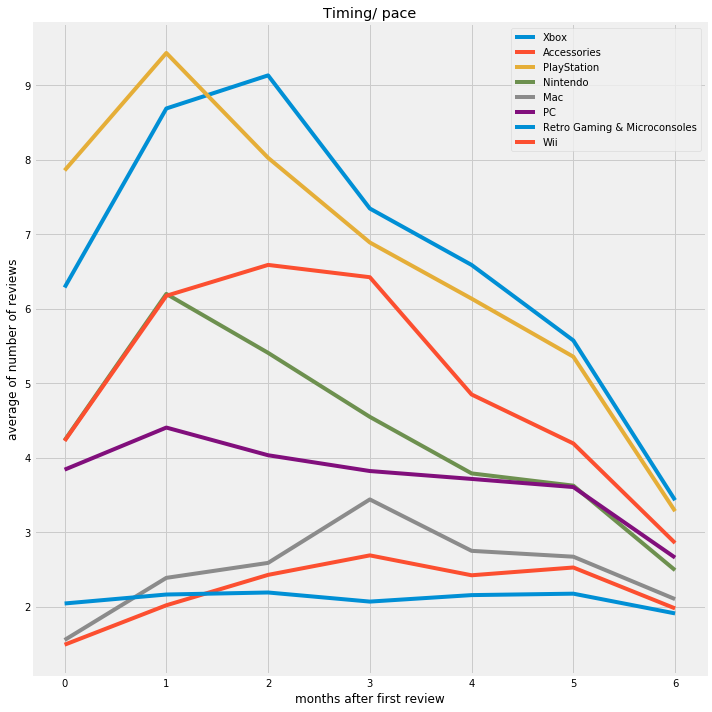

In [21]:
fig = plt.figure(figsize=(10,10))


ax = fig.add_subplot(111)

a = dff[dff['cat2'] == 'Xbox']
x = a['duration_month']
y = a['count']
ax.plot(x,y, label='Xbox')

a = dff[dff['cat2'] == 'Accessories']
x = a['duration_month']
y = a['count']
ax.plot(x,y, label='Accessories')

a = dff[dff['cat2'] == 'PlayStation']
x = a['duration_month']
y = a['count']
ax.plot(x,y, label='PlayStation')

a = dff[dff['cat2'] == 'Nintendo']
x = a['duration_month']
y = a['count']
ax.plot(x,y, label='Nintendo')

a = dff[dff['cat2'] == 'Mac']
x = a['duration_month']
y = a['count']
ax.plot(x,y, label='Mac')

a = dff[dff['cat2'] == 'PC']
x = a['duration_month']
y = a['count']
ax.plot(x,y, label='PC')

a = dff[dff['cat2'] == 'Retro Gaming & Microconsoles']
x = a['duration_month']
y = a['count']
ax.plot(x,y, label= 'Retro Gaming & Microconsoles')

a = dff[dff['cat2'] == 'Wii']
x = a['duration_month']
y = a['count']
ax.plot(x,y, label='Wii')


ax.set_title('Timing/ pace')
ax.set_xlabel('months after first review')
ax.set_ylabel('average of number of reviews')
ax.legend(loc='best')
    
fig.tight_layout()
plt.show()

In [112]:
remove = df[df['duration'].dt.days > 182].index

df0 = df.drop(remove)

In [113]:
df0

,asin,overall,verified,timestamp,month,year,unixReviewTime,reviewerID,vote,count,cat2,rank,also_view,also_buy,min,max,delta,duration,rank2
7,0439381673,5.0,True,2012-10-29,10,2012,1351468800,A19GOZTT15KPG1,3,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN,2012-10-29,2017-12-13,1871 days,0 days,"5,927"
36,0700026657,4.0,True,2012-02-04,2,2012,1328313600,ATI21V0A8K25G,10,1,PC,">#30,230 in Video Games (See Top 100 in Video ...","['B013F0IP1C', 'B00JDP1AWU', 'B00XR3YC2E', 'B0...",NaN,2012-02-04,2017-08-02,2006 days,0 days,"30,230"
80,0700099867,5.0,True,2011-08-14,8,2011,1313280000,AN3YYDZAS3O1Y,11,1,PC,">#50,093 in Video Games (See Top 100 in Video ...",NaN,NaN,2011-06-14,2016-11-21,1987 days,61 days,"50,093"
81,0700099867,4.0,True,2011-07-27,7,2011,1311724800,A3BQMSVKFEZHLU,NaN,1,PC,">#50,093 in Video Games (See Top 100 in Video ...",NaN,NaN,2011-06-14,2016-11-21,1987 days,43 days,"50,093"
82,0700099867,4.0,True,2011-06-14,6,2011,1308009600,A361M14PU2GUEG,2,1,PC,">#50,093 in Video Games (See Top 100 in Video ...",NaN,NaN,2011-06-14,2016-11-21,1987 days,0 days,"50,093"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934656,B01HIU43S4,1.0,True,2016-09-14,9,2016,1473811200,A1UIUV0YRYPAAV,NaN,1,Accessories,">#57,498 in Video Games (See Top 100 in Video ...","['B06XWBY3YP', 'B0735Z2941', 'B06XWBLSKW', 'B0...",NaN,2016-08-31,2017-06-18,291 days,14 days,"57,498"
1934657,B01HIU43S4,3.0,True,2016-09-14,9,2016,1473811200,A2R23YU8XD4UT3,NaN,1,Accessories,">#57,498 in Video Games (See Top 100 in Video ...","['B06XWBY3YP', 'B0735Z2941', 'B06XWBLSKW', 'B0...",NaN,2016-08-31,2017-06-18,291 days,14 days,"57,498"
1934665,B01HJ14TTA,1.0,True,2016-08-25,8,2016,1472083200,A3VR4YQX79A5WQ,NaN,1,PlayStation,">#62,150 in Video Games (See Top 100 in Video ...",NaN,NaN,2016-08-25,2017-09-26,397 days,0 days,"62,150"
1934667,B01HJ149LI,5.0,True,2016-08-14,8,2016,1471132800,A3B5U84BFEICEP,NaN,1,PlayStation,NaN,NaN,NaN,2016-08-02,2017-07-24,356 days,12 days,NaN


In [23]:
df0 = pd.DataFrame(df0.groupby(['cat2','year'])['count'].agg(np.sum)).reset_index()

In [24]:
df0

,cat2,year,count
0,Accessories,2001,2
1,Accessories,2006,7
2,Accessories,2007,40
3,Accessories,2008,176
4,Accessories,2009,211
...,...,...,...
116,Xbox,2013,12595
117,Xbox,2014,20557
118,Xbox,2015,25755
119,Xbox,2016,24536


In [25]:
cat = set(df0['cat2'])

a = [i for i in cat for k in range(19)]
b = [i for k in range(8) for i in np.arange(1999,2018,1)]
c = [0 for k in range(152)]

d = {
    'cat2': a,
    'year': b,
    'count': c
}

d = pd.DataFrame(d)

In [26]:
df0 =pd.concat([df0,d],axis=0)

In [27]:
df0 = pd.DataFrame(df0.groupby(['cat2', 'year'])['count'].agg(np.sum)).reset_index()

In [28]:
df0

,cat2,year,count
0,Accessories,1999,0
1,Accessories,2000,0
2,Accessories,2001,2
3,Accessories,2002,0
4,Accessories,2003,0
...,...,...,...
147,Xbox,2013,12595
148,Xbox,2014,20557
149,Xbox,2015,25755
150,Xbox,2016,24536


In [29]:
a = df0[df0['cat2'] == 'PC']
x = np.array(a['year'])
y = np.array(a['count'])


a = df0[df0['cat2'] == 'Retro Gaming & Microconsoles']
x2 = np.array(a['year'])
y2 = np.array(a['count'])

a = df0[df0['cat2'] == 'Mac']
x3 = np.array(a['year'])
y3 = np.array(a['count'])

a = df0[df0['cat2'] == 'PlayStation']
x4 = np.array(a['year'])
y4 = np.array(a['count'])


a = df0[df0['cat2'] == 'Nintendo']
x5 = np.array(a['year'])
y5 = np.array(a['count'])


a = df0[df0['cat2'] == 'Accessories']
x6 = np.array(a['year'])
y6 = np.array(a['count'])

a = df0[df0['cat2'] == 'Xbox']
x7 = np.array(a['year'])
y7 = np.array(a['count'])

a = df0[df0['cat2'] == 'Wii']
x8 = np.array(a['year'])
y8 = np.array(a['count'])

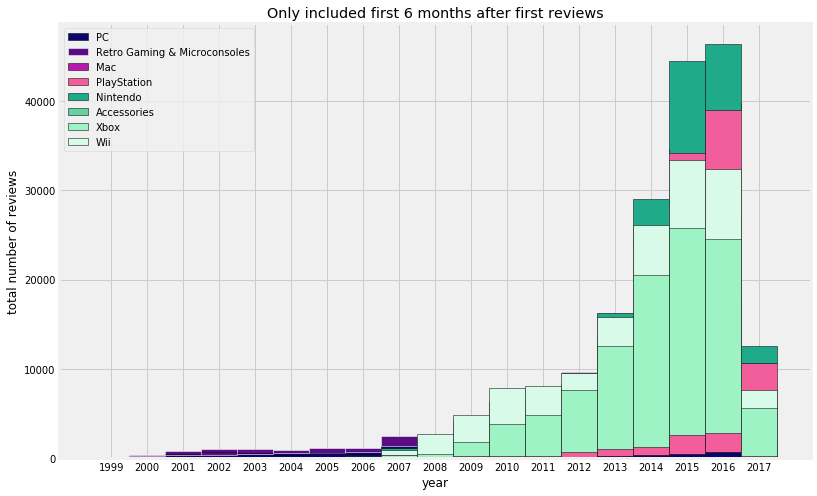

In [30]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111, xticks=x, xticklabels =x)


ax.bar(x,y, width=1, label='PC', ec= 'k', color='#0C056D')
ax.bar(x2,y2, width=1, bottom=y, label='Retro Gaming & Microconsoles', ec='white', color='#590D82')
ax.bar(x3,y3, width=1, bottom=y2, label='Mac', ec='k', color='#B61AAE')
ax.bar(x4,y4, width=1, bottom=y3, label='PlayStation', ec='k', color='#F25D9C')
ax.bar(x5,y5, width=1, bottom=y4, label='Nintendo', ec='k', color='#1FAB89')
ax.bar(x6,y6, width=1, bottom=y5, label='Accessories', ec='k', color='#62D2A2')
ax.bar(x7,y7, width=1, bottom=y6, label='Xbox', ec='k', color='#9DF3C4')
ax.bar(x8,y8, width=1, bottom=y7, label='Wii', ec='k', color='#D7FBE8')


ax.legend(loc='best')
ax.set_xlabel('year')
ax.set_ylabel('total number of reviews')
ax.set_title('Only included first 6 months after first reviews')

    
plt.show()

In [31]:
a = pd.DataFrame(df.groupby('year')['count'].agg(np.sum)).reset_index()
X = a['year']
Y = a['count']

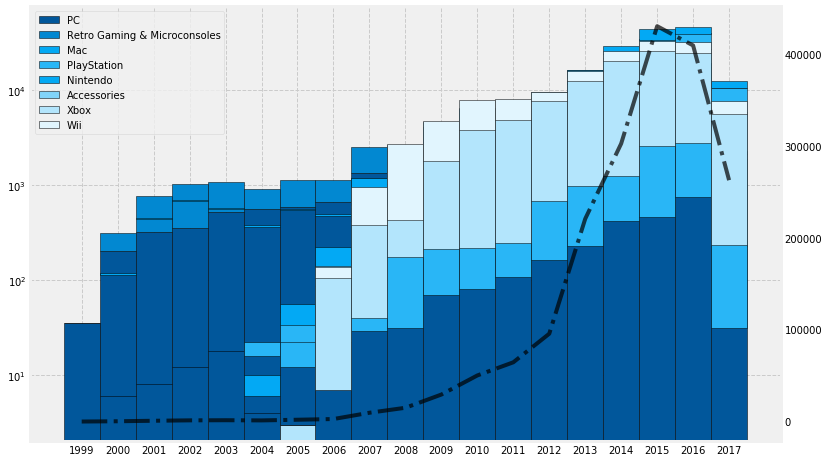

In [32]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111, xticks=x, xticklabels =x)


ax.bar(x,y, width=1, label='PC', color='#01579B', ec='k')
ax.bar(x2,y2, width=1, bottom=y, label='Retro Gaming & Microconsoles', color='#0288D1', ec='k')
ax.bar(x3,y3, width=1, bottom=y2, label='Mac', color='#03A9F4', ec='k')
ax.bar(x4,y4, width=1, bottom=y3, label='PlayStation', color='#29B6F6', ec='k')
ax.bar(x5,y5, width=1, bottom=y4, label='Nintendo', color='#03A9F4', ec='k')
ax.bar(x6,y6, width=1, bottom=y5, label='Accessories', color='#81D4FA', ec='k')
ax.bar(x7,y7, width=1, bottom=y6, label='Xbox', color='#B3E5FC', ec='k')
ax.bar(x8,y8, width=1, bottom=y7, label='Wii', color='#E1F5FE', ec='k')
ax.grid(ls='--')

ax.legend(loc='best')
ax.set_yscale('log')

ax2 = ax.twinx()
ax2.plot(X,Y,color='k',alpha=0.7,ls='-.')
ax2.grid(ls='')

plt.show()

In [33]:
gr_cat = df.groupby('cat2')
gr_verified = df.groupby('verified')
gr_year = df.groupby(['year','cat2'])

In [34]:
df2 = pd.DataFrame(gr_cat['count'].agg(np.sum))
df2.reset_index(inplace=True)

In [35]:
x = df2['cat2']
y = df2['count']

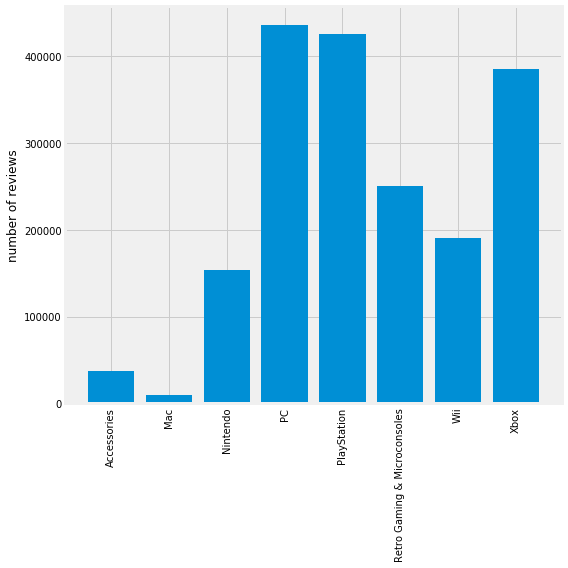

In [36]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)

ax.bar(x,y)
ax.set_xticklabels(x, rotation='vertical')
ax.set_ylabel('number of reviews')

plt.tight_layout()
plt.show()

In [37]:
df3 = pd.DataFrame(gr_cat['overall'].agg(np.mean))
df3.reset_index(inplace=True)

In [38]:
x2 = df3['cat2']
y2 = df3['overall']

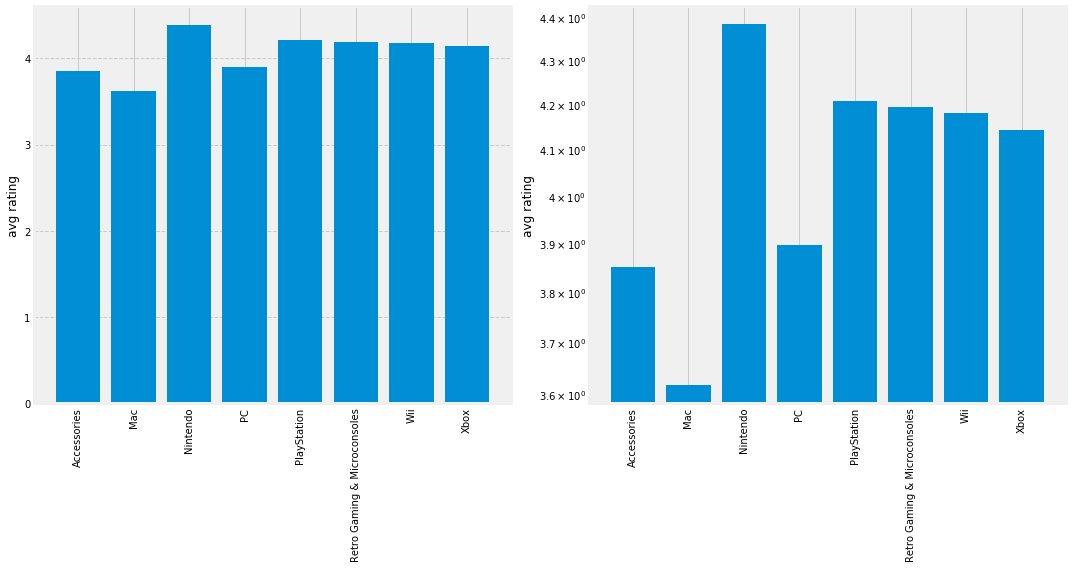

In [39]:
fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(121)

ax.bar(x2,y2)
ax.set_xticklabels(x, rotation='vertical')
ax.set_ylabel('avg rating')
ax.grid(ls='--', axis='y')

ax2 = fig.add_subplot(122)

ax2.bar(x2,y2)
ax2.set_xticklabels(x, rotation='vertical')
ax2.set_ylabel('avg rating')
ax2.set_yscale('log')


plt.tight_layout()
plt.show()

In [40]:
df13 = pd.DataFrame(df.groupby(['cat2','year'])['overall'].agg(np.mean))
df13.reset_index(inplace=True)

In [41]:
df13

,cat2,year,overall
0,Accessories,2001,4.000000
1,Accessories,2002,5.000000
2,Accessories,2006,3.250000
3,Accessories,2007,3.296296
4,Accessories,2008,4.284404
...,...,...,...
117,Xbox,2013,4.196982
118,Xbox,2014,4.189505
119,Xbox,2015,4.192958
120,Xbox,2016,4.128123


In [42]:
df14 = df13[df13['cat2'] == 'Accessories']
df15 = df13[df13['cat2'] == 'Mac']
df16 = df13[df13['cat2'] == 'Nintendo']
df17 = df13[df13['cat2'] == 'PC']
df18 = df13[df13['cat2'] == 'PlayStation']
df19 = df13[df13['cat2'] == 'Retro Gaming & Microconsoles']
df20 = df13[df13['cat2'] == 'Wii']
df21 = df13[df13['cat2'] == 'Xbox']

In [43]:
x14 = df14['year']
y14 = df14['overall']

x15 = df15['year']
y15 = df15['overall']

x16 = df16['year']
y16 = df16['overall']

x17 = df17['year']
y17 = df17['overall']

x18 = df18['year']
y18 = df18['overall']

x19 = df19['year']
y19 = df19['overall']

x20 = df20['year']
y20 = df20['overall']

x21 = df21['year']
y21 = df21['overall']


In [44]:
df22 = pd.DataFrame(df.groupby('year')['overall'].agg(np.mean))
df22.reset_index(inplace=True)

In [45]:
x22 = df22['year']
y22 =df22['overall']

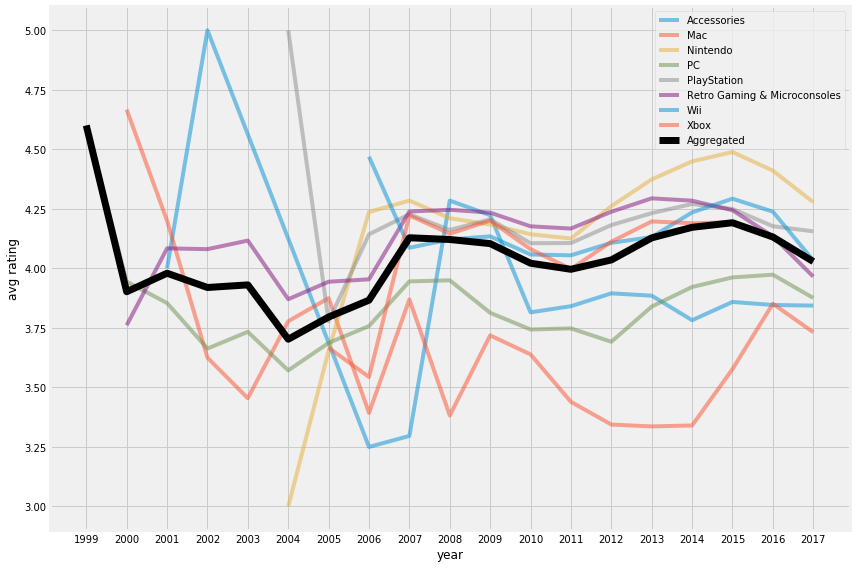

In [46]:
fig = plt.figure(figsize=(12,8))

year = np.arange(1997,2019,1)

ax = fig.add_subplot(111, xticks=year, xticklabels=year)

ax.plot(x14,y14, label= 'Accessories', alpha=0.5)
ax.plot(x15,y15, label= 'Mac', alpha=0.5)
ax.plot(x16,y16, label= 'Nintendo', alpha=0.5)
ax.plot(x17,y17, label= 'PC', alpha=0.5)
ax.plot(x18,y18, label= 'PlayStation', alpha=0.5)
ax.plot(x19,y19, label= 'Retro Gaming & Microconsoles', alpha=0.5)
ax.plot(x20,y20, label= 'Wii', alpha=0.5)
ax.plot(x21,y21, label= 'Xbox', alpha=0.5)

ax.plot(x22,y22, label='Aggregated', color='k', lw=7)

ax.legend()
ax.set_ylabel('avg rating')
ax.set_xlabel('year')

fig.tight_layout()
plt.show()

In [47]:
df23 = pd.DataFrame(df.groupby('year')['count'].agg(np.sum))
df23.reset_index(inplace=True)

In [48]:
y22_1 = df23['count']

## Rank

In [49]:
dfnew = df['rank'].str.split('>',n=1,expand=True)

dfnew = dfnew[1].str.split('#', n=1, expand=True)

dfnew = dfnew[1].str.split(' ', n=1, expand=True)

In [50]:
dfnew = pd.DataFrame(dfnew[0])

In [51]:
dfnew.loc[:,'rank2'] = dfnew[0]

In [52]:
dfnew.drop(0, axis=1, inplace=True)

In [53]:
dfnew.head()

,rank2
0,"5,927"
1,"5,927"
2,"5,927"
3,"5,927"
4,"5,927"


In [54]:
dfnew = pd.DataFrame(dfnew['rank2'])

In [55]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900466 entries, 0 to 1934679
Data columns (total 1 columns):
rank2    object
dtypes: object(1)
memory usage: 109.0+ MB


In [56]:
df = pd.concat([df,dfnew], axis=1)

In [57]:
df.head()

,asin,overall,verified,timestamp,month,year,unixReviewTime,reviewerID,vote,count,cat2,rank,also_view,also_buy,min,max,delta,duration,rank2
0,0439381673,1.0,True,2014-06-09,6,2014,1402272000,A21ROB4YDOZA5P,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN,2012-10-29,2017-12-13,1871 days,588 days,"5,927"
1,0439381673,3.0,True,2014-05-10,5,2014,1399680000,A3TNZ2Q5E7HTHD,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN,2012-10-29,2017-12-13,1871 days,558 days,"5,927"
2,0439381673,4.0,True,2014-02-07,2,2014,1391731200,A1OKRM3QFEATQO,15,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN,2012-10-29,2017-12-13,1871 days,466 days,"5,927"
3,0439381673,1.0,True,2014-02-07,2,2014,1391731200,A2XO1JFCNEYV3T,11,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN,2012-10-29,2017-12-13,1871 days,466 days,"5,927"
4,0439381673,4.0,True,2014-01-16,1,2014,1389830400,A19WLPIRHD15TH,NaN,1,PC,">#5,927 in Video Games (See Top 100 in Video G...","['B00005LBVS', 'B002CMU748', 'B01JF4CHWK', 'B0...",NaN,2012-10-29,2017-12-13,1871 days,444 days,"5,927"


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900466 entries, 0 to 1934679
Data columns (total 19 columns):
asin              object
overall           float64
verified          bool
timestamp         datetime64[ns]
month             int64
year              int64
unixReviewTime    int64
reviewerID        object
vote              object
count             int64
cat2              object
rank              object
also_view         object
also_buy          object
min               datetime64[ns]
max               datetime64[ns]
delta             timedelta64[ns]
duration          timedelta64[ns]
rank2             object
dtypes: bool(1), datetime64[ns](3), float64(1), int64(4), object(8), timedelta64[ns](2)
memory usage: 357.3+ MB


In [59]:
# need to convert rank2 from object to integer

In [60]:
dfnew = pd.DataFrame(df[['asin','overall','rank2','count','cat2']])
dfnew.head()

,asin,overall,rank2,count,cat2
0,0439381673,1.0,"5,927",1,PC
1,0439381673,3.0,"5,927",1,PC
2,0439381673,4.0,"5,927",1,PC
3,0439381673,1.0,"5,927",1,PC
4,0439381673,4.0,"5,927",1,PC


In [61]:
dfnew.dropna(inplace=True)

In [62]:
a = dfnew['rank2'].str.split(',')

b= []

for i in a:
    if len(i) == 2:
        b.append(int(i[0]+i[1]))
    elif len(i) ==3:
        b.append(int(i[0]+i[1]+i[2]))
    else:
        b.append(int(i[0]))

In [63]:
b = pd.DataFrame(b, columns=['rank2'])
b

,rank2
0,5927
1,5927
2,5927
3,5927
4,5927
...,...
1830088,16087
1830089,16087
1830090,16087
1830091,16087


In [64]:
dfnew

,asin,overall,rank2,count,cat2
0,0439381673,1.0,"5,927",1,PC
1,0439381673,3.0,"5,927",1,PC
2,0439381673,4.0,"5,927",1,PC
3,0439381673,1.0,"5,927",1,PC
4,0439381673,4.0,"5,927",1,PC
...,...,...,...,...,...
1934675,B01HJC33WS,5.0,"16,087",1,Xbox
1934676,B01HJC33WS,5.0,"16,087",1,Xbox
1934677,B01HJC33WS,5.0,"16,087",1,Xbox
1934678,B01HJC33WS,5.0,"16,087",1,Xbox


In [65]:
dfnew.drop(['rank2'],axis=1,inplace=True)

dfnew.drop(['rank2'], axis=1, inplace=True)

In [66]:
dfnew.reset_index(inplace=True)
b.reset_index(inplace=True)

In [67]:
dfnew

,index,asin,overall,count,cat2
0,0,0439381673,1.0,1,PC
1,1,0439381673,3.0,1,PC
2,2,0439381673,4.0,1,PC
3,3,0439381673,1.0,1,PC
4,4,0439381673,4.0,1,PC
...,...,...,...,...,...
1830088,1934675,B01HJC33WS,5.0,1,Xbox
1830089,1934676,B01HJC33WS,5.0,1,Xbox
1830090,1934677,B01HJC33WS,5.0,1,Xbox
1830091,1934678,B01HJC33WS,5.0,1,Xbox


In [68]:
dfnew = pd.concat([dfnew,b], axis=1)

In [69]:
dfnew

,index,asin,overall,count,cat2,index,rank2
0,0,0439381673,1.0,1,PC,0,5927
1,1,0439381673,3.0,1,PC,1,5927
2,2,0439381673,4.0,1,PC,2,5927
3,3,0439381673,1.0,1,PC,3,5927
4,4,0439381673,4.0,1,PC,4,5927
...,...,...,...,...,...,...,...
1830088,1934675,B01HJC33WS,5.0,1,Xbox,1830088,16087
1830089,1934676,B01HJC33WS,5.0,1,Xbox,1830089,16087
1830090,1934677,B01HJC33WS,5.0,1,Xbox,1830090,16087
1830091,1934678,B01HJC33WS,5.0,1,Xbox,1830091,16087


In [70]:
dfnew2 = pd.DataFrame(dfnew.groupby('asin')['overall'].agg(np.mean))

In [71]:
dfnew3 = pd.DataFrame(dfnew.groupby('asin')['count'].agg(np.sum))

In [72]:
dfnew4 = pd.DataFrame(dfnew.groupby('asin')['rank2'].agg(np.mean))

In [73]:
dfnew5 = pd.DataFrame(dfnew.drop_duplicates(['asin']))

In [74]:
dfnew5 = dfnew5[['asin', 'cat2']]

In [75]:
dfnew2

,overall
asin,
043933702X,3.666667
0439339960,4.000000
0439342260,4.500000
0439381673,3.282051
0439394422,3.000000
...,...
B01HIZF7XE,4.707483
B01HIZGKOE,3.304348
B01HJ14TTA,3.666667


In [76]:
dfnew3

,count
asin,
043933702X,6
0439339960,3
0439342260,2
0439381673,39
0439394422,3
...,...
B01HIZF7XE,147
B01HIZGKOE,23
B01HJ14TTA,3


In [77]:
dfnew4

,rank2
asin,
043933702X,51505
0439339960,87937
0439342260,114262
0439381673,5927
0439394422,64461
...,...
B01HIZF7XE,2260
B01HIZGKOE,5207
B01HJ14TTA,62150


In [78]:
dfnew5.set_index('asin', inplace=True)

In [79]:
dfnewfinal = pd.concat([dfnew2,dfnew3,dfnew4,dfnew5],axis=1, sort=False)

In [80]:
dfnewfinal.reset_index(inplace=True)

In [81]:
dfnewfinal

,index,overall,count,rank2,cat2
0,043933702X,3.666667,6,51505,PC
1,0439339960,4.000000,3,87937,PC
2,0439342260,4.500000,2,114262,PC
3,0439381673,3.282051,39,5927,PC
4,0439394422,3.000000,3,64461,PC
...,...,...,...,...,...
40358,B01HIZF7XE,4.707483,147,2260,Xbox
40359,B01HIZGKOE,3.304348,23,5207,PlayStation
40360,B01HJ14TTA,3.666667,3,62150,PlayStation
40361,B01HJC33WS,4.588235,17,16087,Xbox


In [82]:
drop = dfnewfinal[dfnewfinal['count'] < 11].index

dfnewfinal.drop(drop,inplace=True)

In [83]:
dfnewfinal

,index,overall,count,rank2,cat2
3,0439381673,3.282051,39,5927,PC
16,0700026398,4.111111,18,58163,PC
18,0700026657,3.254902,51,30230,PC
19,0700099867,3.435897,78,50093,PC
30,1616616873,4.727273,11,69172,PC
...,...,...,...,...,...
40357,B01HIU43S4,3.076923,13,57498,Accessories
40358,B01HIZF7XE,4.707483,147,2260,Xbox
40359,B01HIZGKOE,3.304348,23,5207,PlayStation
40361,B01HJC33WS,4.588235,17,16087,Xbox


In [84]:
dfnewfinal.sort_values('rank2', inplace=True)

# reverse rank
dfnewfinal.loc[:,'rank3'] = dfnewfinal['rank2'].values[::-1]

In [85]:
dfnewfinal1 = dfnewfinal[dfnewfinal['cat2'] == 'Accessories']

dfnewfinal2 = dfnewfinal[dfnewfinal['cat2'] == 'Mac']

dfnewfinal3 = dfnewfinal[dfnewfinal['cat2'] == 'Nintendo']

dfnewfinal4 = dfnewfinal[dfnewfinal['cat2'] == 'PC']

dfnewfinal5 = dfnewfinal[dfnewfinal['cat2'] == 'PlayStation']

dfnewfinal6 = dfnewfinal[dfnewfinal['cat2'] == 'Retro Gaming & Microconsoles']

dfnewfinal7 = dfnewfinal[dfnewfinal['cat2'] == 'Wii']

dfnewfinal8 = dfnewfinal[dfnewfinal['cat2'] == 'Xbox']

In [86]:

y1 = dfnewfinal1['rank3']
z1 = dfnewfinal1['overall'] **3.5
x1 = dfnewfinal1['count']

y2 = dfnewfinal2['rank3']
z2 = dfnewfinal2['overall']**3.5
x2 = dfnewfinal2['count']

y3 = dfnewfinal3['rank3']
z3 = dfnewfinal3['overall']**3.5
x3 = dfnewfinal3['count']

y4 = dfnewfinal4['rank3']
z4 = dfnewfinal4['overall']**3.5
x4 = dfnewfinal4['count']

y5 = dfnewfinal5['rank3']
z5 = dfnewfinal5['overall']**3.5
x5 = dfnewfinal5['count']

y6 = dfnewfinal6['rank3']
z6 = dfnewfinal6['overall']**3.5
x6 = dfnewfinal6['count']

y7 = dfnewfinal7['rank3']
z7 = dfnewfinal7['overall']**3.5
x7 = dfnewfinal7['count']

y8 = dfnewfinal8['rank3']
z8 = dfnewfinal8['overall']**3.5
x8 = dfnewfinal8['count']

In [87]:
dfnewfinal

,index,overall,count,rank2,cat2,rank3
38231,B019OB663A,4.505382,1765,1,PC,4952385
30220,B00IEUVTNU,3.425676,148,1,Xbox,3451907
33853,B00RSXRLUE,4.607870,1474,1,Wii,2191766
39881,B01FZ3BR5S,4.425926,270,1,PC,2040387
38587,B01AZC3III,4.275184,407,1,PC,1889586
...,...,...,...,...,...,...
6945,B000235UU0,3.888889,54,1889586,PC,1
13753,B000VDJFIE,4.923077,13,2040387,Nintendo,1
32931,B00OC4D732,2.037037,27,2191766,Accessories,1
9365,B000B6OR4I,5.000000,139,3451907,Xbox,1


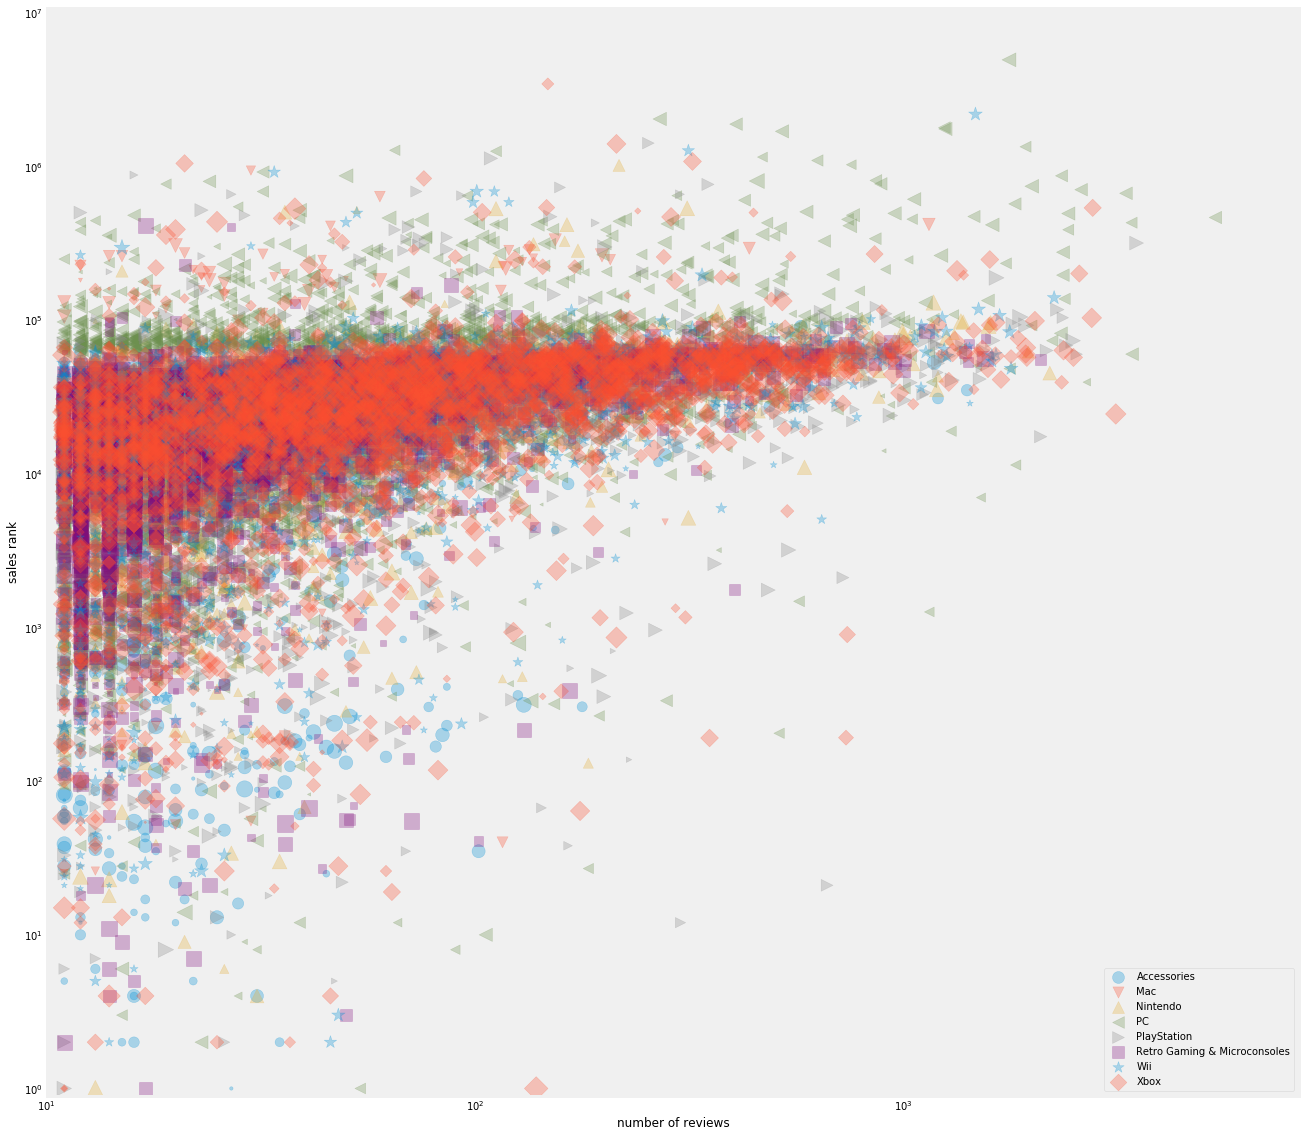

In [88]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(111)

ax.scatter(x1,y1, alpha=0.3, marker='o', label='Accessories',s=z1)
ax.scatter(x2,y2, alpha=0.3, marker='v', label='Mac',s=z2)
ax.scatter(x3,y3, alpha=0.3, marker='^', label='Nintendo',s=z3)
ax.scatter(x4,y4, alpha=0.3, marker='<', label='PC',s=z4)
ax.scatter(x5,y5, alpha=0.3, marker='>', label='PlayStation',s=z5)
ax.scatter(x6,y6, alpha=0.3, marker='s', label='Retro Gaming & Microconsoles',s=z6)
ax.scatter(x7,y7, alpha=0.3, marker='*', label='Wii',s=z7)
ax.scatter(x8,y8, alpha=0.3, marker='D', label='Xbox',s=z8)


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=10)
ax.set_ylim(ymin=0.9)

ax.set_xlabel('number of reviews')
ax.set_ylabel('sales rank')

ax.grid(ls='')
ax.legend(loc=4)

fig.tight_layout
plt.show()

In [89]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.formula.api as smf

In [90]:
m_0 = smf.ols('np.log(rank3) ~ np.log(count)',
              data = dfnewfinal)

m_0_res = m_0.fit()

print(m_0_res.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(rank3)   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     4116.
Date:                Thu, 07 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:23:43   Log-Likelihood:                -34159.
No. Observations:               19723   AIC:                         6.832e+04
Df Residuals:                   19721   BIC:                         6.834e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.5309      0.035    213.967

In [91]:
m_0 = smf.ols('np.log(rank3) ~ np.log(count) + overall',
              data = dfnewfinal)

m_0_res = m_0.fit()

print(m_0_res.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(rank3)   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     2371.
Date:                Thu, 07 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:23:43   Log-Likelihood:                -33903.
No. Observations:               19723   AIC:                         6.781e+04
Df Residuals:                   19720   BIC:                         6.784e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.1074      0.072     85.346

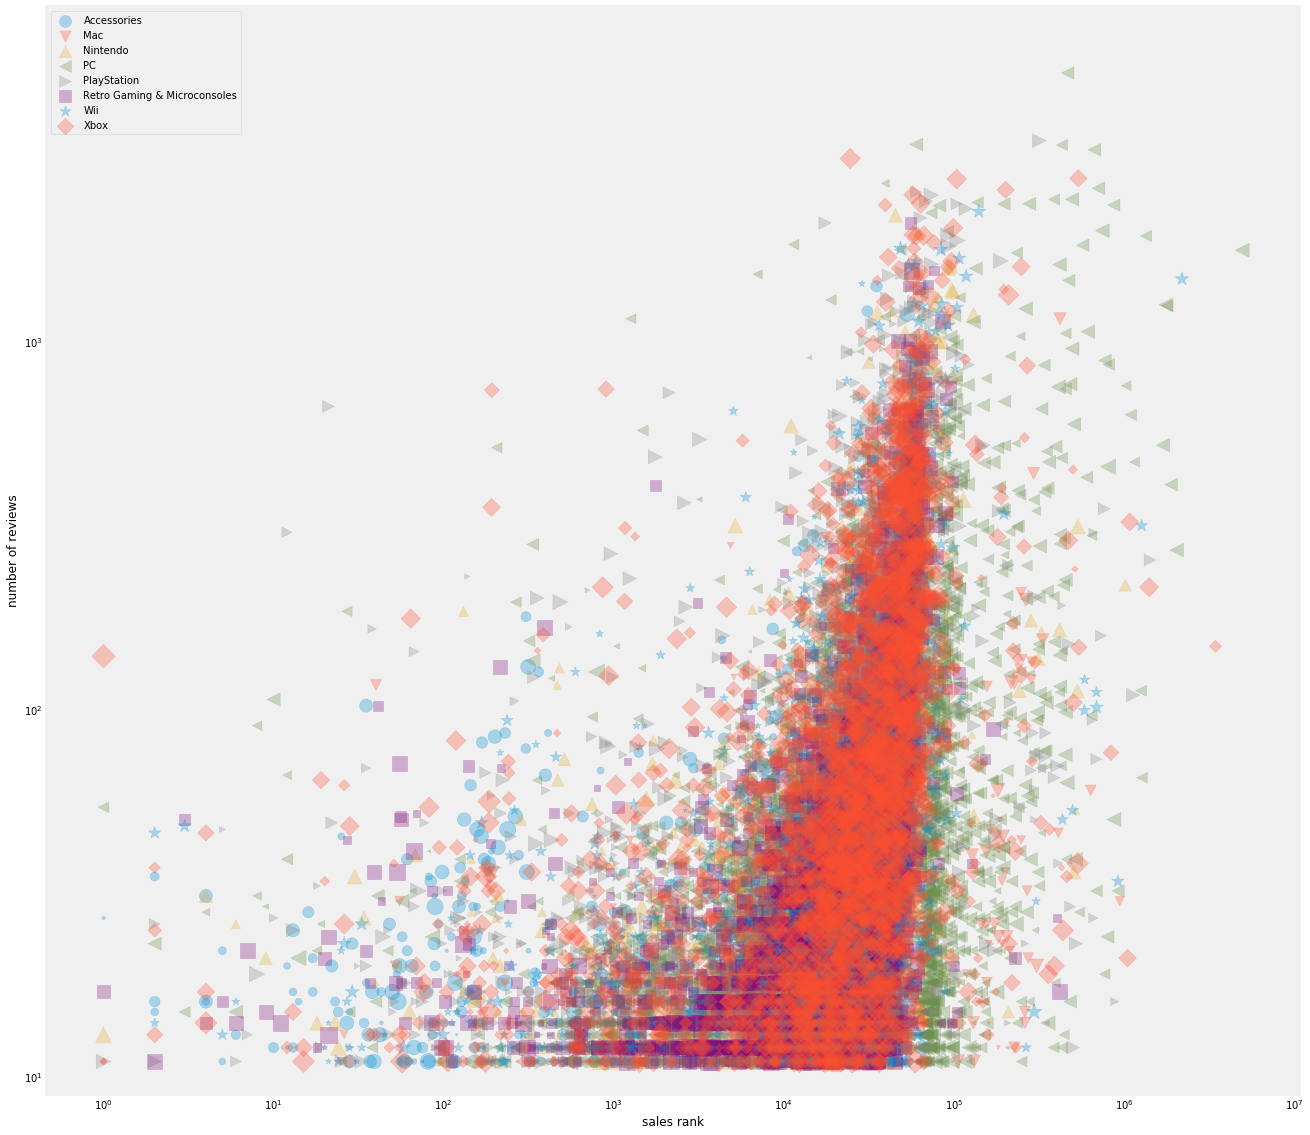

In [92]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(111)

ax.scatter(y1,x1, alpha=0.3, marker='o', label='Accessories',s=z1)
ax.scatter(y2,x2, alpha=0.3, marker='v', label='Mac',s=z2)
ax.scatter(y3,x3, alpha=0.3, marker='^', label='Nintendo',s=z3)
ax.scatter(y4,x4, alpha=0.3, marker='<', label='PC',s=z4)
ax.scatter(y5,x5, alpha=0.3, marker='>', label='PlayStation',s=z5)
ax.scatter(y6,x6, alpha=0.3, marker='s', label='Retro Gaming & Microconsoles',s=z6)
ax.scatter(y7,x7, alpha=0.3, marker='*', label='Wii',s=z7)
ax.scatter(y8,x8, alpha=0.3, marker='D', label='Xbox',s=z8)


ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim(left=10)
ax.set_ylim(ymin=9)

ax.set_ylabel('number of reviews')
ax.set_xlabel('sales rank')

ax.grid(ls='')
ax.legend(loc=2)

fig.tight_layout
plt.show()

In [93]:
m_0 = smf.ols('np.log(count) ~ np.log(rank3)',
              data = dfnewfinal)

m_0_res = m_0.fit()

print(m_0_res.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(count)   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     4116.
Date:                Thu, 07 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:23:44   Log-Likelihood:                -27372.
No. Observations:               19723   AIC:                         5.475e+04
Df Residuals:                   19721   BIC:                         5.476e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8442      0.045     18.731

In [94]:
dfnewfinal

,index,overall,count,rank2,cat2,rank3
38231,B019OB663A,4.505382,1765,1,PC,4952385
30220,B00IEUVTNU,3.425676,148,1,Xbox,3451907
33853,B00RSXRLUE,4.607870,1474,1,Wii,2191766
39881,B01FZ3BR5S,4.425926,270,1,PC,2040387
38587,B01AZC3III,4.275184,407,1,PC,1889586
...,...,...,...,...,...,...
6945,B000235UU0,3.888889,54,1889586,PC,1
13753,B000VDJFIE,4.923077,13,2040387,Nintendo,1
32931,B00OC4D732,2.037037,27,2191766,Accessories,1
9365,B000B6OR4I,5.000000,139,3451907,Xbox,1


In [95]:
dfnewfinal.loc[:,'count2'] = 1
gr_cat2 = dfnewfinal.groupby('cat2')

In [96]:
dfnewfinal9 = pd.DataFrame(gr_cat2['count'].agg(np.mean))
dfnewfinal10 = pd.DataFrame(gr_cat2['count2'].agg(np.sum))
dfnewfinal11 = pd.DataFrame(gr_cat2['rank3'].agg(np.median))

In [97]:
dfnewfinal9

,count
cat2,
Accessories,49.210963
Mac,48.374269
Nintendo,76.408872
PC,85.937228
PlayStation,109.527891
Retro Gaming & Microconsoles,53.797376
Wii,97.797735
Xbox,119.197784


In [98]:
dfnewfinal = pd.concat([dfnewfinal9,dfnewfinal10,dfnewfinal11],axis=1)

In [99]:
dfnewfinal.reset_index(inplace=True)

In [100]:
dfnewfinal

,cat2,count,count2,rank3
0,Accessories,49.210963,602,7138.5
1,Mac,48.374269,171,12430.0
2,Nintendo,76.408872,1871,24698.0
3,PC,85.937228,4365,17240.0
4,PlayStation,109.527891,3675,24702.0
5,Retro Gaming & Microconsoles,53.797376,4116,23525.0
6,Wii,97.797735,1854,25759.0
7,Xbox,119.197784,3069,26518.0


In [101]:
x = dfnewfinal['count']
y = dfnewfinal['rank3']
size = dfnewfinal['count2']
cat = dfnewfinal['cat2']

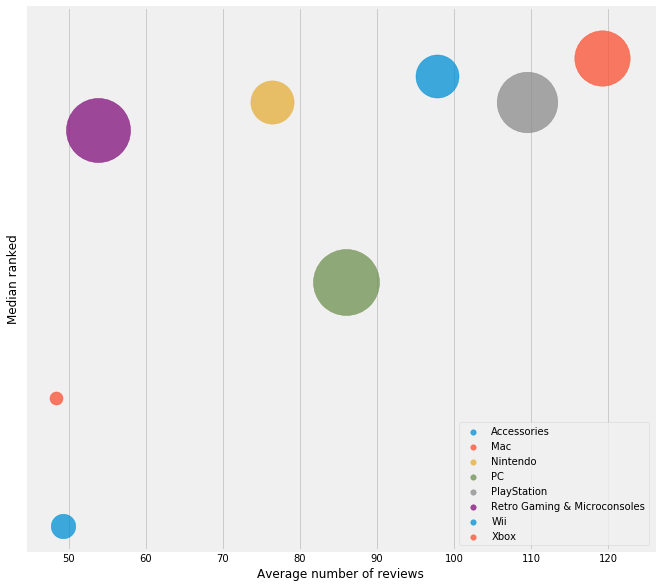

In [102]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, yticklabels=[])

for i in np.arange(0,8,1):
    ax.scatter(x[i],y[i], alpha=0.75, marker='o', label=cat[i],s=size[i])



#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_ylim(bottom=20000,top=55000)
#ax.set_xlim(left=0)

ax.set_xlabel('Average number of reviews')
ax.set_ylabel('Median ranked')
ax.grid(axis='y')

legend = ax.legend(loc=4)
for i in np.arange(0,8,1):
    legend.legendHandles[i]._sizes = [30]

fig.tight_layout
plt.show()

Ordinal variable is better fitted using 'median' than mean or mode

https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php

In [103]:
import networkx as nx

In [104]:
df0 = df[['also_buy','also_view','asin', 'cat2']]

cat = df0[df0['cat2'] != 'Nintendo'].index
df0.drop(cat,inplace=True)

/Users/smartiiv/anaconda3/envs/data_visualisation/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [105]:
df0.drop_duplicates(inplace=True)

/Users/smartiiv/anaconda3/envs/data_visualisation/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [106]:
df0

,also_buy,also_view,asin,cat2
403,['B0045IIQ4U'],['B00KGE51RW'],3828770193,Nintendo
1081,NaN,NaN,9625990992,Nintendo
28853,"['B002TDIEDG', 'B001AF1NVY', 'B002BRWU8U', 'B0...","['B075MSKYRK', 'B00136MBHA', 'B004CVWETI', 'B0...",B000035XQ6,Nintendo
79607,"['B000068GUZ', 'B000068GVK', 'B000068GVO', 'B0...","['B000065V6R', 'B00002SVG0', 'B0000645OV', 'B0...",B000068GVL,Nintendo
127371,"['B000068GUV', 'B004IWS1RA', 'B0001PW264', 'B0...","['B01M1VMFUA', 'B075MK6THW', 'B07D2HMM6Q', 'B0...",B0001PW6E2,Nintendo
...,...,...,...,...
1934457,"['B01K1OO5PU', 'B00RZ7T8TK', 'B01MDQP1ZU', 'B0...",['B00UJ9LB6Y'],B01HEQPRAK,Nintendo
1934461,"['B00RZ7T8TK', 'B01K1OO5PU', 'B00UJ9LB6Y', 'B0...","['B00UJ9LB6Y', 'B076KRDRQG', 'B01N1QHE13', 'B0...",B01HEQVKZQ,Nintendo
1934467,"['B00RZ7T8TK', 'B01K1OO5PU', 'B00L59D9HG', 'B0...","['B00UJ9LB6Y', 'B01N1QHE13', 'B07CWLKTRT', 'B0...",B01HEQUM5K,Nintendo
1934473,"['B00LX8N14A', 'B00RZ7T8TK', 'B00LX8MZWY', 'B0...",NaN,B01HEQWB3Q,Nintendo


In [107]:
asin = df0['asin']

also_buy = list(df0['also_buy'])
also_view = list(df0['also_view'])  
node_list = list(asin)
edge_list = []     

In [108]:
for product, buy in zip(asin,also_buy):
    if type(buy) == str:
        buy = [a.strip() for a in buy.split(',')]
        if type(buy) == list:
            for buy2 in buy:
                buy2 = buy2.strip('[')
                buy2 = buy2.strip(']')
                buy2 = buy2.strip("\\'")
                buy2 = buy2.strip("\\'")
                
                if buy2 in node_list:
                    edge_list.append([product,buy2])
                if buy2 not in node_list:
                    pass
    else:
        pass


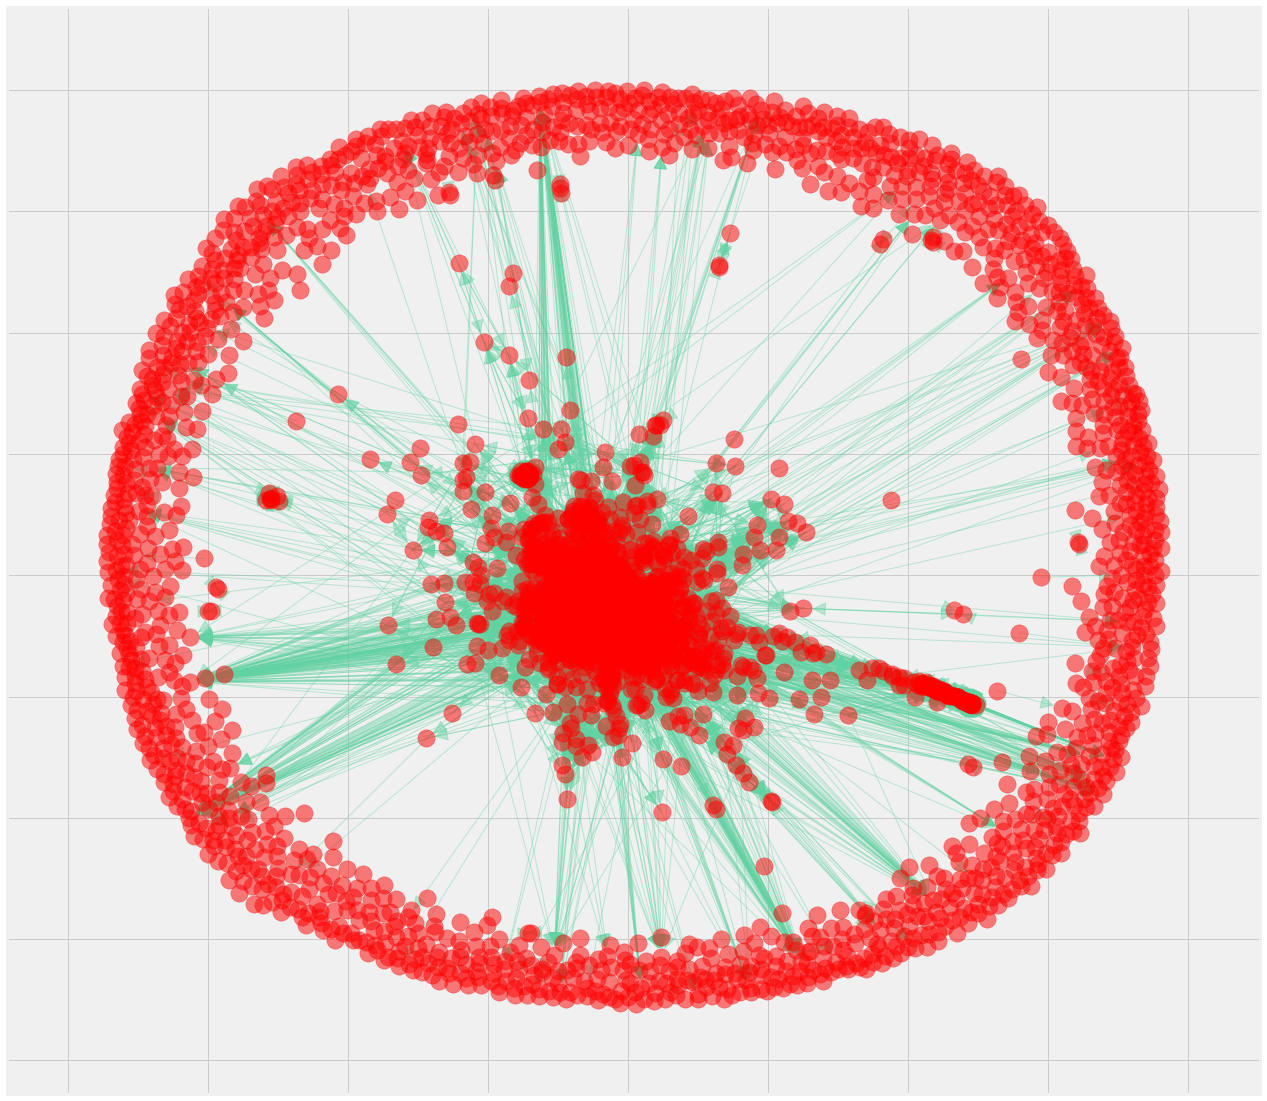

In [114]:

G = nx.DiGraph()

G.add_nodes_from(node_list)
G.add_edges_from(edge_list)


fig = plt.figure(figsize=(20,20))

pos = nx.layout.spring_layout(G)

# draw nodes
nodes = nx.draw_networkx_nodes(G, pos, nodelist=node_list, node_color='red', alpha=0.5)

# draw arrows
edges = nx.draw_networkx_edges(G, pos, edgelist=edge_list,edge_color='#62d2a2', rrowstyle='->',
                               arrowsize=30,alpha=0.4, width=1)



In [120]:
x = nx.algorithms.centrality.degree_centrality(G)

In [121]:
x

{'3828770193': 0.0005039052658100278,
 '9625990992': 0.0,
 'B000035XQ6': 0.018392542202066015,
 'B000068GVL': 0.0010078105316200555,
 'B0001PW6E2': 0.002015621063240111,
 'B00025LDLI': 0.0012597631645250695,
 'B00064MUIA': 0.0002519526329050139,
 'B00069BUXG': 0.0,
 'B00069ZINO': 0.0012597631645250695,
 'B00069ZIO8': 0.0035273368606701942,
 'B0006A9SM0': 0.0022675736961451248,
 'B0006A9SLQ': 0.0022675736961451248,
 'B0006B0O90': 0.010078105316200556,
 'B0006B0O9U': 0.07105064247921392,
 'B0006B98DI': 0.009826152683295541,
 'B0006TO2HM': 0.016628873771730918,
 'B0006VGY26': 0.002015621063240111,
 'B00076OMOW': 0.006550768455530361,
 'B0007D4MVS': 0.014613252708490804,
 'B0007D4MWC': 0.006550768455530361,
 'B0007KTBG2': 0.007558578987150417,
 'B0007MRKN6': 0.004283194759385236,
 'B0007NWLZ2': 0.0078105316200554305,
 'B0007P0U3U': 0.0012597631645250695,
 'B0007ULFFC': 0.010582010582010583,
 'B0007WWYLE': 0.005794910556815319,
 'B00092A720': 0.0017636684303350971,
 'B00092A71Q': 0.00503905

In [125]:
y = [x[i] for i in x]

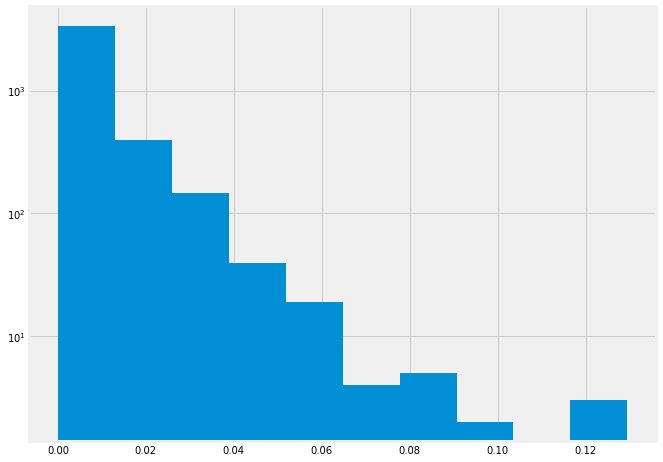

In [132]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111)

ax.hist(y, bins=10)
ax.set_yscale('log')

plt.show()